# Training the sentiment classifier

## Load the data

In [1]:
from mba.data import (
    get_text_train_df,
    get_text_rollout_df,
)

In [2]:
train_df = get_text_train_df()

In [3]:
train_df

,ID,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,...,solut,normal,corner,gourmet,product,sinc,was,look,onto,rating
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,1,0,1
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1996,1997,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
1997,1998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,1,0,1
1998,1999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [4]:
train_df = train_df.drop('ID', axis=1)
train_df.head(3)

,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,picki,...,solut,normal,corner,gourmet,product,sinc,was,look,onto,rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,1,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X = train_df.drop(['rating'], axis=1)
X.head(3)

,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,picki,...,veri,solut,normal,corner,gourmet,product,sinc,was,look,onto
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check this will work with review data

In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('/Users/shaypalachy/clones/mba/data/reviews_training.csv')

In [77]:
df = df.drop('ID', axis=1)

In [78]:
df.head(3)

,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,picki,...,veri,solut,normal,corner,gourmet,product,sinc,was,look,onto
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
list(df.columns) == list(X.columns)

True

In [6]:
# X.columns

In [7]:
# y = train_df['rating']

In [8]:
# y.value_counts()

In [9]:
# from sklearn.model_selection import train_test_split

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Selecting a model with pycaret

In [11]:
from pycaret.classification import setup, compare_models

In [41]:
setup?

In [13]:
clf_handle = setup(
    data = train_df,
    target = 'rating',
    train_size=0.8,
    session_id=123,
    numeric_features=list(X.columns),
    normalize=True,
    remove_perfect_collinearity=True,
    data_split_stratify=True,
    silent=True,
) 

,Description,Value
0,session_id,123
1,Target,rating
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2000, 2001)"
5,Missing Values,0
6,Numeric Features,2000
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [44]:
compare_models?

In [14]:
top3 = compare_models(n_select=3, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8525,0.9150,0.9192,0.8520,0.8838,0.6824,0.6878,0.3010
lr,Logistic Regression,0.8450,0.9155,0.8987,0.8590,0.8770,0.6675,0.6730,0.6160
catboost,CatBoost Classifier,0.8431,0.9260,0.9243,0.8373,0.8780,0.6594,0.6683,3.1920
xgboost,Extreme Gradient Boosting,0.8406,0.9187,0.8978,0.8520,0.8734,0.6584,0.6628,3.7900
lightgbm,Light Gradient Boosting Machine,0.8369,0.9110,0.8875,0.8528,0.8693,0.6523,0.6549,1.2620
rf,Random Forest Classifier,0.8225,0.9036,0.9346,0.8077,0.8659,0.6076,0.6239,0.2510
gbc,Gradient Boosting Classifier,0.8212,0.9047,0.9141,0.8171,0.8620,0.6101,0.6215,0.7880
svm,SVM - Linear Kernel,0.8038,0.0000,0.9734,0.7713,0.8594,0.5497,0.5966,0.0570
ada,Ada Boost Classifier,0.8019,0.8792,0.8721,0.8181,0.8432,0.5743,0.5794,0.2350
ridge,Ridge Classifier,0.7294,0.0000,0.7781,0.7808,0.7788,0.4299,0.4310,0.0560


In [15]:
print(top3)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), <catboost.core.CatBoostClassifier object at 0x15489d160>]


In [16]:
# from pycaret.classification import create_model

In [17]:
# # train individual models to blend
# lightgbm = create_model('lightgbm', verbose = False)
# et = create_model('et', verbose = False)
# lr = create_model('lr', verbose = False)

In [18]:
from pycaret.classification import blend_models

In [26]:
# blend individual models
# blend_soft = blend_models(estimator_list = [lightgbm, et, lr], method = 'soft')

In [20]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8375,0.9115,0.9082,0.8396,0.8725,0.6494,0.6532
1,0.8438,0.9352,0.9388,0.8288,0.8804,0.6577,0.6683
2,0.9250,0.9753,0.9796,0.9057,0.9412,0.8382,0.8431
3,0.9125,0.9735,0.9388,0.9200,0.9293,0.8146,0.8149
4,0.9062,0.9445,0.9388,0.9109,0.9246,0.8007,0.8014
5,0.8062,0.9154,0.9388,0.7863,0.8558,0.5675,0.5885
6,0.8500,0.9348,0.9286,0.8426,0.8835,0.6744,0.6807
7,0.8500,0.9220,0.9082,0.8558,0.8812,0.6783,0.6805
8,0.9000,0.9558,0.8969,0.9355,0.9158,0.7928,0.7939
9,0.8312,0.9447,0.9381,0.8125,0.8708,0.6311,0.6448


In [21]:
from pycaret.classification import predict_model, finalize_model

In [22]:
res = predict_model(blender_top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8625,0.9317,0.8934,0.8826,0.8880,0.7100,0.7101


In [56]:
from pycaret.classification import get_metrics

In [57]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x149d2bd30>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x149d21af0>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x149d390d0>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x149d39310>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, auc, roc_curve

In [38]:
y_true = res['rating']
y_pred = res['Label']

In [65]:
for metric in (accuracy_score, roc_auc_score, recall_score, precision_score, f1_score):
    print(metric.__name__)
    print(metric(y_true, y_pred))

accuracy_score
0.8625
roc_auc_score
0.8537725935266919
recall_score
0.8934426229508197
precision_score
0.8825910931174089
f1_score
0.8879837067209775


In [28]:
predict_model?

In [23]:
final_blended = finalize_model(blender_top3)

In [24]:
from pycaret.classification import plot_model

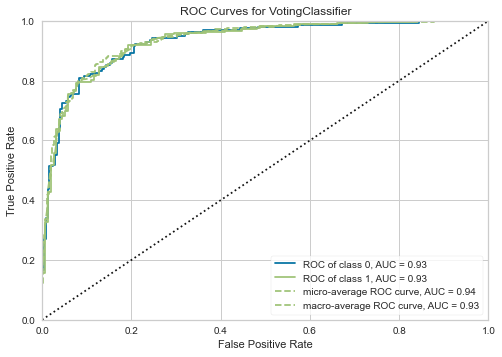

In [25]:
plot_model(blender_top3, plot = 'auc')

In [67]:
from pycaret.classification import save_model

In [69]:
save_model?

In [ ]:
from pycaret.classification import save_model

In [ ]:
# et = create_model('et')

In [ ]:
# from pycaret.classification import tune_model

In [ ]:
# tuned_et = tune_model(et)

In [ ]:
# from pycaret.classification import plot_model

In [ ]:
# plot_model(et, plot = 'auc')

In [ ]:
# plot_model(tuned_et, plot = 'auc')

In [ ]:
# from pycaret.classification import predict_model, finalize_model

In [ ]:
# predict_model(tuned_et);

In [ ]:
# predict_model(et);

In [ ]:
# final_et = finalize_model(et)

In [ ]:
# final_et

In [70]:
import pickle

In [71]:
pickle.dump?